In [14]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import EulerSolver, plot_1d_slice
from superfv.initial_conditions import sod_shock_tube_1d
from teyssier import cons_to_prim, weno

Sod Shock Tube

In [15]:
N = 100
p = 3

sim = EulerSolver(
    ic=sod_shock_tube_1d,
    bcx="free",
    nx=N,
    p=p,
    riemann_solver="hllct",
    flux_recipe=3,
    lazy_primitives=True,
    ZS=True,
    SED=True,
    PAD={"rho": (0, None), "P": (0, None)},
)
sim.run(0.245, allow_overshoot=True)

t, ut = weno(
    0.245,
    N,
    ic_type="sod test",
    bc_type="free",
    riemann_solver="hllc",
    time=p + 1,
    space=p + 1,
)
x = (np.arange(ut.shape[2]) + 0.5) / ut.shape[2]
wt = cons_to_prim(ut[-1, :, :])

Step #67 @ t=2.47e-01 | dt=3.63e-03 | min(rho)=1.25e-01, min(P)=1.00e-01 | (done)                   
cell= 100  itermax= 100000
Done  67 0.24739037389936655


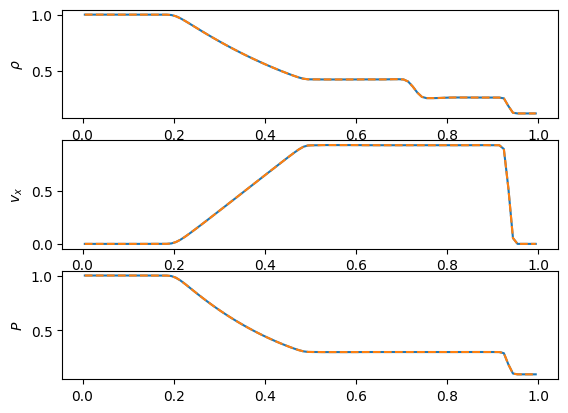

In [16]:
fig, axs = plt.subplots(3, 1)

axs[0].set_ylabel(r"$\rho$")
axs[1].set_ylabel(r"$v_x$")
axs[2].set_ylabel(r"$P$")

axs[0].plot(x, wt[0, :], label="APC-523")
plot_1d_slice(sim, axs[0], "rho", label="superfv", cell_averaged=True, linestyle="--")

axs[1].plot(x, wt[1, :], label="APC-523")
plot_1d_slice(sim, axs[1], "vx", label="superfv", cell_averaged=True, linestyle="--")

axs[2].plot(x, wt[2, :], label="APC-523")
plot_1d_slice(sim, axs[2], "P", label="superfv", cell_averaged=True, linestyle="--")